***Read Data***

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df = df.dropna()
X = df.drop('Species', axis=1)
y = df['Species']


***Model the data***

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


In [12]:
from sklearn import tree

model = tree.DecisionTreeClassifier()

In [13]:
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

***Predict and check accuracy***

In [14]:
y_predict=model.predict(X_test)
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.9736842105263158

***Confusion matrix***

In [25]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(confusion_matrix(y_test, y_predict),  columns=['Iris-sentosa','Iris-versicolor','Iris-virginica'],
    index=['True Iris-sentosa', 'True Iris-versicolor','True Iris-virginica'])

,Iris-sentosa,Iris-versicolor,Iris-virginica
True Iris-sentosa,13,0,0
True Iris-versicolor,0,15,1
True Iris-virginica,0,0,9


***Visualzation of the tree***

In [18]:
from sklearn.tree import plot_tree

In [19]:
import sklearn
print(sklearn.__version__)

0.21.3


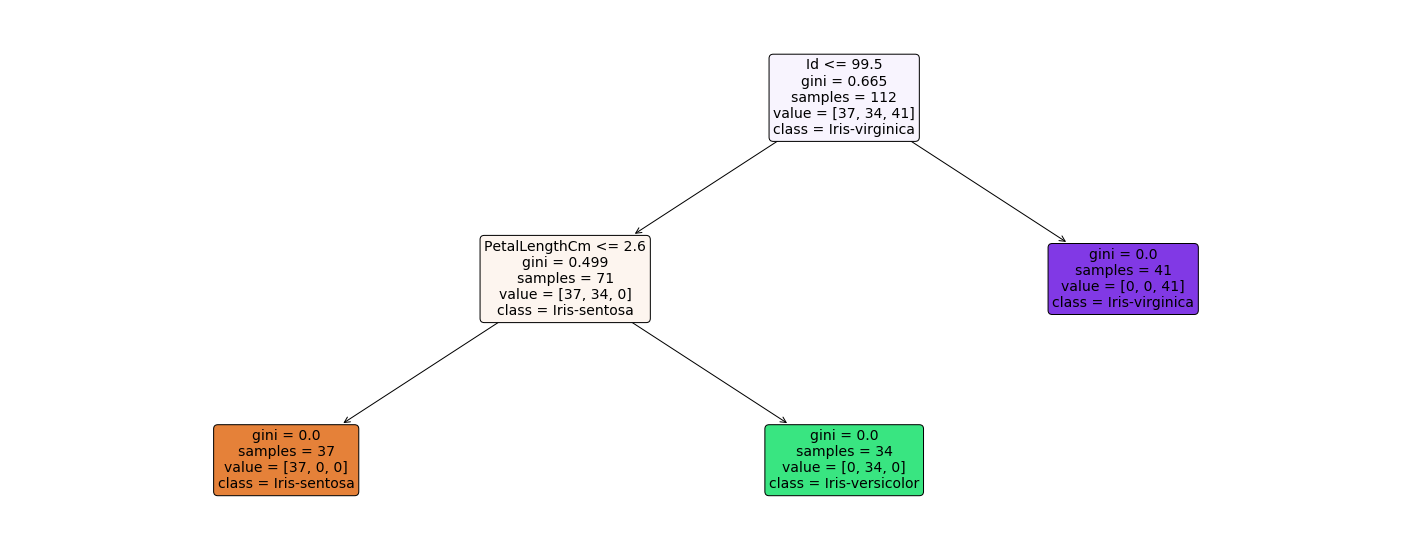

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25,10))
a = plot_tree(model, 
              feature_names=list(X.columns), 
              class_names=['Iris-sentosa','Iris-versicolor','Iris-virginica'], 
              filled=True, 
              rounded=True, 
              fontsize=14)

In [22]:
a

[Text(1162.5, 641.6666666666666, 'Id <= 99.5\ngini = 0.665\nsamples = 112\nvalue = [37, 34, 41]\nclass = Iris-virginica'),
 Text(775.0, 385.0, 'PetalLengthCm <= 2.6\ngini = 0.499\nsamples = 71\nvalue = [37, 34, 0]\nclass = Iris-sentosa'),
 Text(387.5, 128.33333333333326, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]\nclass = Iris-sentosa'),
 Text(1162.5, 128.33333333333326, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]\nclass = Iris-versicolor'),
 Text(1550.0, 385.0, 'gini = 0.0\nsamples = 41\nvalue = [0, 0, 41]\nclass = Iris-virginica')]